# Fraud detection with Scikit-learn

Using Scikit-learn to detect fraudulent transactions through Logistic Regression techniques. In order to do this the dataset available [here](https://www.kaggle.com/mlg-ulb/creditcardfraud/) will be used.

Mount drive directory to access the datasets.

In [9]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Import the necessary libraries.

In [0]:
from sklearn import linear_model, preprocessing, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Import dataset and perform data preprocessing.

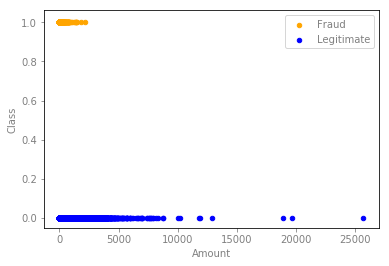

In [17]:
data = pd.read_csv('/content/drive/My Drive/Notebooks/Fraud_detection/data/train_transaction.csv', low_memory=False)

# Visualise the data.
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'

fraud = data.loc[data['Class'] == 1]
legit = data.loc[data['Class'] == 0]
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
legit.plot.scatter(x='Amount', y='Class', color='Blue', label='Legitimate', ax=ax)
plt.show

# Drop rows with missing values.
data.dropna(axis=0, inplace=True)

# Select features (Amount and 'V1', ..., 'V28' features) and label (Class)
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]
label = 'Class'

# Create variables containing feature data and label data.
feature_data = data[features]
label_data = data[label]

# Normalise feature data.
scaler = preprocessing.StandardScaler()
feature_data = scaler.fit_transform(feature_data)

Split into training and testing data.

In [0]:
# Create index for the split.
split_index = int(data.shape[0] * 0.8)

# Create training sets.
x_train = feature_data[:split_index]
y_train = label_data[:split_index]

# Create testing sets.
x_test = feature_data[split_index:]
y_test = label_data[split_index:]


Create Logistic Regression model.

In [13]:
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
    
# And finally: show the results
print(metrics.classification_report(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.91      0.56      0.69        75

    accuracy                           1.00     56962
   macro avg       0.96      0.78      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Mean Absolute Error: 0.0006495558442470419
Mean Squared Error: 0.0006495558442470419
Root Mean Squared Error: 0.025486385468462214

